**XML format handling**

In [ ]:
# run this part(script) as a whole
import bz2 
import xml.etree.ElementTree as xml
import pandas as pd

# Data conversions
# create a list that contains 
conversion = [
    ('vendor', int),
    ('people', int),
    ('tip', float),
    ('price', float),
    ('pickup', pd.to_datetime), # time type
    ('dropoff', pd.to_datetime), # time type
    ('distance', float),
]


def iter_rides(file_name):
    with bz2.open(file_name, 'rt') as fp:
        tree = xml.parse(fp)

    rides = tree.getroot()
    for elem in rides:
        record = {}
        for tag, func in conversion:
            text = elem.find(tag).text
            record[tag] = func(text)
        yield record

def load_xml(file_name):
    records = iter_rides(file_name)
    return pd.DataFrame.from_records(records)

In [17]:
# import bulit-in library to handle bz2 file
import bz2
# import simple bulit-in library to handle xml file
import xml.etree.ElementTree as xml

import pandas as pd

In [18]:
pd.to_datetime # the pandas bulit-in function to convert dtypes to time

<function pandas.core.tools.datetimes.to_datetime>

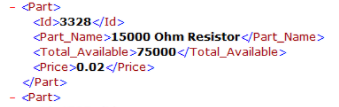

In [ ]:
# Data conversions
# create a list that contains attributes and data type within the xml file (above is sample xml format)
conversion = [
    ('vendor', int),
    ('people', int),
    ('tip', float),
    ('price', float),
    ('pickup', pd.to_datetime), # time type
    ('dropoff', pd.to_datetime), # time type
    ('distance', float),
]

In [ ]:
def iter_rides(file_name):
    with bz2.open(file_name, 'rt') as fp:
        tree = xml.parse(fp)

    rides = tree.getroot()
    for elem in rides:
        record = {}
        for tag, func in conversion:
            text = elem.find(tag).text
            record[tag] = func(text)
        yield record

In [ ]:
# write a function to parse xml file
# using with statement 
with bz2.open(file_name, 'rt') as fp:    # with open function 'r' read mode as whatever
  tree = xml.parse(fp)                   # then define a element tree with parsed data

In [6]:
tree  # the tree is the Element Tree object 

In [7]:
print(tree)

In [19]:
tree.getroot() # here, rides are the root start --- end (<rides> ... <rides/>)

<Element 'rides' at 0x7feb43a4c950>

In [9]:
rides = tree.getroot()

<Element 'rides' at 0x7feb43a4c950>

In [ ]:
# DO NOT RUN this part 
    for elem in rides:
        record = {}                           # create a dictionary
        for tag, func in conversion:
            text = elem.find(tag).text        # assign that extracted text to text
            record[tag] = func(text)          # this is to add the extracted data, and put that into python dictionary
        yield record

# two for loops here, for elem in rides: 'vendor', 'people', 'tip' are the elements in each ride

In [27]:
conversion = [
    ('vendor', int),
    ('people', int),
    ('tip', float),
    ('price', float),
    ('pickup', pd.to_datetime), # time type
    ('dropoff', pd.to_datetime), # time type
    ('distance', float),
]

for tag, func in conversion:
  print(tag, func)

print('\n')


record = {}
record['vendor'] = func('2')
print(record)

vendor <class 'int'>
people <class 'int'>
tip <class 'float'>
price <class 'float'>
pickup <function to_datetime at 0x7feb52e029e0>
dropoff <function to_datetime at 0x7feb52e029e0>
distance <class 'float'>


{'vendor': 2.0}


In [21]:
# for example, in the first ride:
rides[0].find('vendor').text

'2'

In [22]:
# for example, in the first ride:
rides[0].find('people').text

'1'

In [23]:
# for example, in the first ride:
rides[0].find('tip').text

'4.74'

In [ ]:
# the yield is similar to return, but instead of producing actual output, yield is to produce generator

# then use the yield records to pass data into pandas dataframe

df = pd.DataFrame.from_records(records)